<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-исходных-данных" data-toc-modified-id="Изучение-исходных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение исходных данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-(Дерево-решений)" data-toc-modified-id="Decision-Tree-(Дерево-решений)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Decision Tree (Дерево решений)</a></span></li><li><span><a href="#Random-Forest-(Случайный-лес)" data-toc-modified-id="Random-Forest-(Случайный-лес)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest (Случайный лес)</a></span></li><li><span><a href="#Logistic-Regression-(Логистическая-регрессия)" data-toc-modified-id="Logistic-Regression-(Логистическая-регрессия)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic Regression (Логистическая регрессия)</a></span></li><li><span><a href="#Catboost-(Градиентный-бустинг)" data-toc-modified-id="Catboost-(Градиентный-бустинг)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Catboost (Градиентный бустинг)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Class-weight-(взвешивание-классов)" data-toc-modified-id="Class-weight-(взвешивание-классов)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Class weight (взвешивание классов)</a></span></li><li><span><a href="#Upsampling-(увеличение-выборки)" data-toc-modified-id="Upsampling-(увеличение-выборки)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling (увеличение выборки)</a></span></li><li><span><a href="#Downsampling-(уменьшение-выборки)" data-toc-modified-id="Downsampling-(уменьшение-выборки)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling (уменьшение выборки)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Изучение исходных данных

In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle

In [2]:
# чтение файла с данными и сохранение в переменную df
try:
    df = pd.read_csv('C:/Users/79853/Documents/datascience/yandex/g Спринт8/Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv') # загрузка онлайн

In [3]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# процент пропущенных значений в датасете
df.isnull().sum() / df.shape[0] * 100

RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [5]:
# описание переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# получение первых 5 строк таблицы df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Признаки:**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак:**
- Exited — факт ухода клиента

In [7]:
# уникальные значения поля Tenure (сколько лет человек является клиентом банка)
sorted(df.Tenure.unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]

In [8]:
# уникальные значения поля Geography (страна проживания)
sorted(df.Geography.unique())

['France', 'Germany', 'Spain']

In [9]:
# уникальные значения поля Gender (пол)
sorted(df.Gender.unique())

['Female', 'Male']

#### Вывод

В датасете присутствуют количественные и категориальные переменные. 

В названиях полей нарушен стиль написания - строчные буквы сочетаются с прописными. Необходимо привести названия полей к нижнему регистру и разделить слова символом нижнего подчеркивания.

В поле `Tenure` (сколько лет человек является клиентом банка) есть пропуски, они составляют 9% от общего количества данных. На этапе предобработки данных их можно удалить.

Тип поля `Tenure` (сколько лет человек является клиентом банка) необходимо изменить на int64, т.к. переменная принимает только целочисленные значения.

Поля `RowNumber` (индекс строки в данных), `CustomerId` (уникальный идентификатор клиента), `Surname` (фамилия) не будут использоваться в исследовании, их можно удалить.

Поля `Geography` (страна проживания) и `Gender` (пол) - это категориальные признаки, которые необходимо преобразовать в численные.

Поля `CreditScore` (кредитный рейтинг), `Age` (возраст), `Tenure` (сколько лет человек является клиентом банка), `Balance` (баланс на счёте), `NumOfProducts` (количество продуктов банка, используемых клиентом), `EstimatedSalary` (предполагаемая зарплата) - это количественные признаки, которые имеют разный масштаб. Для проведения исследования их необходимо масштабировать (стандартизировать).

### Предобработка данных

In [10]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

In [11]:
# удаление пропусков 
df = df.dropna()

In [12]:
# изменение типа поля Tenure на int64
df['Tenure'] = df['Tenure'].astype('int64')

In [13]:
# удаление полей RowNumber, CustomerId, Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [14]:
# приведение названий полей к правильному стилю написания
df.set_axis(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
             'is_active_member', 'estimated_salary', 'exited'], axis='columns', inplace=True)

In [15]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Для обучения моделей категориальные признаки необходимо преобразовать в численные. Для этого используем специальные техники.

Техника **прямого кодирования (OHE)** подходит для преобразования признаков в Logistic Regression.

Техника **порядкового кодирования (OrdinalEncoder)** подходит для преобразования признаков в Decision Tree и Random Forest.

Преобразуем данные с помощью двух техник и создадим соответственно два новых датасета - **df_ohe** и **df_ordinal**.

In [16]:
# преобразование с помощью техники OHE
df_ohe = pd.get_dummies(df, columns=['geography', 'gender'], drop_first=True)
df_ohe

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [17]:
# преобразование с помощью техники OrdinalEncoder
encoder = OrdinalEncoder()
df_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)
df_ordinal

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,226.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,4609.0,1.0
1,215.0,2.0,0.0,23.0,1.0,679.0,0.0,0.0,1.0,5119.0,0.0
2,109.0,0.0,0.0,24.0,8.0,5277.0,2.0,1.0,0.0,5182.0,1.0
3,306.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4274.0,0.0
4,457.0,2.0,0.0,25.0,2.0,3374.0,0.0,1.0,1.0,3559.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9086,407.0,0.0,0.0,11.0,2.0,0.0,1.0,0.0,0.0,7599.0,0.0
9087,378.0,0.0,1.0,21.0,5.0,0.0,1.0,1.0,0.0,4385.0,0.0
9088,123.0,0.0,1.0,17.0,10.0,110.0,0.0,1.0,1.0,4627.0,0.0
9089,316.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,1.0,1882.0,1.0


#### Вывод

На этапе предобработки данных было выполнено следующее:
- Удалены пропуски в датасете.
- Удалены поля `RowNumber`, `CustomerId`, `Surname`.
- Названия полей приведены к правильному стилю написания.
- Категориальные признаки в датасете преобразованы в численные с помощью двух техник прямого кодирования (OHE) и порядкового кодирования (OrdinalEncoder).
- Дубликаты не выявлены.

## Исследование задачи

Посмотрим на баланс классов, т.к. дисбаланс классов плохо сказывается на обучении моделей.

In [18]:
df['exited'].value_counts(normalize=True)

0    0.796062
1    0.203938
Name: exited, dtype: float64

Соотношение классов 4:1 говорит о том, что они не сбалансированы. В следующем пункте постараемся избавиться от дисбаланса классов.

Для решения задачи классификации будем использовать следующие алгоритмы:
1. Decision Tree (Дерево решений),
2. Random Forest (Случайный лес),
3. Logistic Regression (Логическая регрессия)
4. Catboost (Градиентный бустинг)

Для проверки моделей на правильность предсказаний нужно разбить данные на три части: **обучающую, валидационную и тестовую**. Размеры тестового и валидационного наборов обычно равны. Разобьем данные в соотношении 3:1:1.

Процентное соотношение от исходного датасета:
- обучающая выборка - 60%,
- валидационная выборка - 20%,
- тестовая выборка - 20%.

In [19]:
# функция для разделения датасета на обучающую, валидационную и тестовую выборки, на признаки и целевой признак
# с масштабированием (стандартизацией) полей
def split_data(data):
    train_df, valid_df = train_test_split(data, test_size=0.4, random_state=123) # обучающая и валидационная - 0,6 и 0,4
    valid_df, test_df = train_test_split(valid_df, test_size=0.5, random_state=123) # валидационная и тестовая - 0,5 и 0,5
    
    # разделение выборок на признаки (features) и целевой признак (target)
    features_train = train_df.drop(['exited'], axis=1)
    target_train = train_df['exited']

    features_valid = valid_df.drop(['exited'], axis=1)
    target_valid = valid_df['exited']

    features_test = test_df.drop(['exited'], axis=1)
    target_test = test_df['exited']
    
    # масштабирование (стандартизация) полей
    numeric=['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric]) 
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])

    return features_train, target_train, features_valid, target_valid, features_test, target_test

In [20]:
# функция для отрисовки ROC-кривой
def roc_graph(model):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    
    plt.figure()
    plt.plot(fpr, tpr, linestyle='solid')
    # ROC-кривая случайной модели (выглядит как прямая)
    plt.plot([0, 1], [0, 1], linestyle='solid')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')

    plt.show()

### Decision Tree (Дерево решений)

Для обучения моделей Decision Tree и Random Forest будет использоваться датасет **df_ordinal**.

In [21]:
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ordinal)

Попробуем подобрать гиперпараметр **max_depth** модели Decision Tree двумя способами:
- с помощью цикла
- с помощью инструмента GridSearchCV

In [22]:
# определим лучшее значение параметра max_depth
best_model_dt = None
best_result, best_depth, best_predictions, best_probabilities_one_valid = 0, 0, 0, 0
for depth in range(1, 100, 2):
    model = DecisionTreeClassifier(random_state=123, max_depth=depth) # модель решающее дерево
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) # предсказания модели
    result = accuracy_score(target_valid, predictions) # качество модели
    if result > best_result:
        best_depth = depth
        best_predictions = predictions
        best_model_dt = model
        best_result = result
print('depth =', best_depth)
print("Accuracy =", best_result)
print('F1-мера =', f1_score(target_valid, best_predictions))

depth = 5
Accuracy = 0.8729372937293729
F1-мера = 0.5633270321361058


Для сравнения определим лучшее значение параметра **max_depth** при помощи GridSearchCV().

In [23]:
clf = DecisionTreeClassifier(random_state=123)
parametrs = {'max_depth': range (1, 100, 2)}
grid = GridSearchCV(clf, parametrs, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(features_train, target_train)
print(grid.best_params_)
print("Accuracy =", grid.best_score_)

{'max_depth': 5}
Accuracy = 0.8531365046796558


Оба способа подбора гиперпараметра max_depth дали одинаковый результат: **max_depth=5**.

In [24]:
# обучение модели и расчет параметров качества модели
best_model_dt = DecisionTreeClassifier(random_state=123, max_depth=5)
best_model_dt.fit(features_train, target_train) # обучение модели
predictions = best_model_dt.predict(features_valid) # предсказания модели
result = accuracy_score(target_valid, predictions) # качество модели
print("Accuracy =", result)
print('F1-мера =', f1_score(target_valid, predictions))

Accuracy = 0.8729372937293729
F1-мера = 0.5633270321361058


Создадим таблицу **result_tbl**, в которую будем добавлять рассчитанные показатели качества моделей - `Accuracy`, `F1-мера`, `Precision`, `Recall`. Также в таблице будет указано название модели в поле `Model` и состояние `State`.

Значения поля `State`:
- *disbalance* - дисбаланс
- *class_weight* - взвешивание классов
- *upsampling* - увеличение выборки
- *downsampling* - уменьшение выборки

In [25]:
columns = ['Accuracy', 'F1-мера', 'Precision', 'Recall', 'Model', 'State']
rows = [[result, f1_score(target_valid, predictions), precision_score(target_valid, predictions),
         recall_score(target_valid, predictions), 'Decision Tree', 'disbalance']]
result_tbl = pd.DataFrame(data=rows, columns=columns)
result_tbl

,Accuracy,F1-мера,Precision,Recall,Model,State
0,0.872937,0.563327,0.827778,0.426934,Decision Tree,disbalance


### Random Forest (Случайный лес)

Попробуем подобрать гиперпараметры **max_depth** и **n_estimators** модели Random Forest двумя способами:
- с помощью цикла
- с помощью инструмента GridSearchCV

In [26]:
# определим лучшую модель с гиперпараметрами n_estimators и max_depth
best_model_rf_2 = None
best_result, best_est, best_depth, best_predictions = 0, 0, 0, 0
for est in range(1, 20):
    for depth in range(1, 10): 
        model = RandomForestClassifier(random_state=123, n_estimators=est, max_depth=depth) # модель
        model.fit(features_train, target_train) # обучение модели на тренировочной выборке
        predictions = model.predict(features_valid) # предсказания модели
        result = model.score(features_valid, target_valid) # качество модели на валидационной выборке
        if result > best_result:
            best_depth = depth
            best_est = est 
            best_predictions = predictions
            best_model_rf_2 = model
            best_result = result
print('n_estimators =', best_est)
print('depth =', best_depth)
print("Accuracy =", best_result)
print('F1-мера =', f1_score(target_valid, best_predictions))

n_estimators = 15
depth = 9
Accuracy = 0.8800880088008801
F1-мера = 0.5962962962962963


In [27]:
row = {'Accuracy': best_result, 'F1-мера': f1_score(target_valid, best_predictions),
       'Precision': precision_score(target_valid, best_predictions), 'Recall': recall_score(target_valid, best_predictions),
       'Model': 'Random Forest', 'State': 'disbalance'}
result_tbl = result_tbl.append(row, ignore_index=True)
result_tbl

,Accuracy,F1-мера,Precision,Recall,Model,State
0,0.872937,0.563327,0.827778,0.426934,Decision Tree,disbalance
1,0.880088,0.596296,0.842932,0.461318,Random Forest,disbalance


Для сравнения определим еще раз значения гиперпараметров для модели Random Forest при помощи инструмента GridSearchCV

In [28]:
clf = RandomForestClassifier(random_state=123)
parametrs = { 'n_estimators': range (1, 20),
              'max_depth': range (1, 10) }
grid = GridSearchCV(clf, parametrs, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(features_train, target_train)
print(grid.best_params_)
print("Accuracy =", grid.best_score_)

{'max_depth': 9, 'n_estimators': 13}
Accuracy = 0.859735786543782


In [29]:
best_model_rf = RandomForestClassifier(random_state=123, max_depth=9, n_estimators=13)
best_model_rf.fit(features_train, target_train) # обучение модели на тренировочной выборке
predictions = best_model_rf.predict(features_valid) # предсказания модели
result = best_model_rf.score(features_valid, target_valid) # качество модели на валидационной выборке
print("Accuracy =", result)
print('F1-мера =', f1_score(target_valid, predictions))

Accuracy = 0.8762376237623762
F1-мера = 0.5794392523364487


Качество модели с параметрами, определенными с помощью инструмента GridSearchCV оказалось хуже.

Далее в работе будет использоваться модель Random Forest с гиперпараметрами **'max_depth': 9, 'n_estimators': 15**

### Logistic Regression (Логистическая регрессия)

Для обучения модели Logistic Regression будет использоваться датасет **df_ohe**.

In [30]:
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ohe)

In [31]:
model_lr = LogisticRegression(solver='lbfgs', random_state=123) # модель логистической регрессии
model_lr.fit(features_train, target_train) # обучение модели на тренировочной выборке
predictions = model_lr.predict(features_valid) # предсказания модели
result = model_lr.score(features_valid, target_valid) # качество модели на валидационной выборке
print("Accuracy =", result)
print('F1-мера =', f1_score(target_valid, predictions))

Accuracy = 0.8217821782178217
F1-мера = 0.3278008298755187


In [32]:
row = {'Accuracy': result, 'F1-мера': f1_score(target_valid, predictions),
       'Precision': precision_score(target_valid, predictions), 'Recall': recall_score(target_valid, predictions),
       'Model': 'Logistic Regression', 'State': 'disbalance'}
result_tbl = result_tbl.append(row, ignore_index=True)
result_tbl

,Accuracy,F1-мера,Precision,Recall,Model,State
0,0.872937,0.563327,0.827778,0.426934,Decision Tree,disbalance
1,0.880088,0.596296,0.842932,0.461318,Random Forest,disbalance
2,0.821782,0.327801,0.593985,0.226361,Logistic Regression,disbalance


### Catboost (Градиентный бустинг)

In [33]:
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df)

In [34]:
best_model_cb = None
best_result, best_iterations, best_predictions = 0, 0, 0
for iteration in range(1, 100, 2):
    model = CatBoostClassifier(random_state=123, iterations=iteration, cat_features=['geography', 'gender'], verbose=0) # модель
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) # предсказания модели
    result = accuracy_score(target_valid, predictions) # качество модели
    if result > best_result:
        best_iterations = iteration
        best_predictions = predictions
        best_model_cb = model
        best_result = result
print('iterations =', best_iterations)
print("Accuracy =", best_result)
print('F1-мера =', f1_score(target_valid, best_predictions))

iterations = 51
Accuracy = 0.8822882288228823
F1-мера = 0.6335616438356165


In [35]:
row = {'Accuracy': best_result, 'F1-мера': f1_score(target_valid, best_predictions),
       'Precision': precision_score(target_valid, best_predictions), 'Recall': recall_score(target_valid, best_predictions),
       'Model': 'Catboost', 'State': 'disbalance'}
result_tbl = result_tbl.append(row, ignore_index=True)
result_tbl

,Accuracy,F1-мера,Precision,Recall,Model,State
0,0.872937,0.563327,0.827778,0.426934,Decision Tree,disbalance
1,0.880088,0.596296,0.842932,0.461318,Random Forest,disbalance
2,0.821782,0.327801,0.593985,0.226361,Logistic Regression,disbalance
3,0.882288,0.633562,0.787234,0.530086,Catboost,disbalance


### Вывод

В ходе исследования задачи был выявлен дисбаланс классов.

Определены гиперпараметры моделей DecisionTree, RandomForest и Catboost с самым высоким значением Accuracy:
- DecisionTreeClassifier(random_state=123, max_depth=**5**)
- RandomForestClassifier(random_state=123, n_estimators=**15**, max_depth=**9**)
- CatBoostClassifier(random_state=123, iterations=**51**, cat_features=['geography', 'gender'])

Рассчитаны показатели качества для моделей: **Accuracy, F1-мера, Precision, Recall**.

Из-за дисбаланса классов прослеживается довольно низкое значение метрики Recall (полноты).

## Борьба с дисбалансом

Для борьбы с дисбалансом будем использовать следующие способы:
- class weight (взвешивание классов)
- upsampling (увеличение выборки)
- downsampling (уменьшение выборки)

In [36]:
# функция для обучения модели и расчета Accuracy, F1-меры
def metrics(model, model_name, state):
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) # предсказания модели
    accuracy = accuracy_score(target_valid, predictions) # качество модели
    f1 = f1_score(target_valid, predictions)
    precision = precision_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    print("Accuracy =", accuracy)
    print('F1-мера =', f1)
    print('Precision =', precision)
    print('Recall =', recall)
    
    # создадим глобальную переменную со значениями показателей качества модели
    global a
    columns = ['Accuracy', 'F1-мера', 'Precision', 'Recall', 'Model', 'State']
    rows = [[accuracy, f1, precision, recall, model_name, state]]
    a = pd.DataFrame(data=rows, columns=columns)

### Class weight (взвешивание классов)

In [37]:
# Decision Tree (Дерево решений)
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ordinal)
model = DecisionTreeClassifier(random_state=123, max_depth=5, class_weight='balanced')
metrics(model, model_name='Decision Tree', state='class_weight') # расчет показателей качества модели
result_tbl = pd.concat([result_tbl, a], axis = 0) # добавление показателей в общую таблицу

Accuracy = 0.8124312431243125
F1-мера = 0.5826193390452876
Precision = 0.5085470085470085
Recall = 0.6819484240687679


In [38]:
# Random Forest (Случайный лес) с гиперпараметрами n_estimators, max_depth
model = RandomForestClassifier(random_state=123, n_estimators=15, max_depth=9, class_weight='balanced')
metrics(model, model_name='Random Forest', state='class_weight')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.8514851485148515
F1-мера = 0.6229050279329609
Precision = 0.6076294277929155
Recall = 0.6389684813753582


In [39]:
# Logistic Regression (Логическая регрессия)
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ohe)
model = LogisticRegression(random_state=123, solver='liblinear', class_weight='balanced')
metrics(model, model_name='Logistic Regression', state='class_weight')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.7194719471947195
F1-мера = 0.48065173116089616
Precision = 0.37282780410742494
Recall = 0.6762177650429799


In [40]:
# Catboost
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df)
model = CatBoostClassifier(random_state=123, iterations=51, cat_features=['geography', 'gender'],
                           auto_class_weights='Balanced', verbose=0)
metrics(model, model_name='Catboost', state='class_weight')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.83003300330033
F1-мера = 0.6334519572953737
Precision = 0.5404858299595142
Recall = 0.7650429799426934


In [41]:
result_tbl

,Accuracy,F1-мера,Precision,Recall,Model,State
0,0.872937,0.563327,0.827778,0.426934,Decision Tree,disbalance
1,0.880088,0.596296,0.842932,0.461318,Random Forest,disbalance
2,0.821782,0.327801,0.593985,0.226361,Logistic Regression,disbalance
3,0.882288,0.633562,0.787234,0.530086,Catboost,disbalance
0,0.812431,0.582619,0.508547,0.681948,Decision Tree,class_weight
0,0.851485,0.622905,0.607629,0.638968,Random Forest,class_weight
0,0.719472,0.480652,0.372828,0.676218,Logistic Regression,class_weight
0,0.830033,0.633452,0.540486,0.765043,Catboost,class_weight


### Upsampling (увеличение выборки)

In [42]:
# функция для увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=123)
    
    return features_upsampled, target_upsampled

Соотношение классов 4:1. Чтобы уравнять классы, установим параметр **repeat=4**

In [43]:
# Decision Tree (Дерево решений)
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ordinal)
features_train, target_train = upsample(features_train, target_train, 4)
model = DecisionTreeClassifier(random_state=123, max_depth=5) # модель решающее дерево
metrics(model, model_name='Decision Tree', state='upsampling')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.8124312431243125
F1-мера = 0.5826193390452876
Precision = 0.5085470085470085
Recall = 0.6819484240687679


In [44]:
# Random Forest (Случайный лес) с гиперпараметрами n_estimators, max_depth
model = RandomForestClassifier(random_state=123, n_estimators=15, max_depth=9) # модель
metrics(model, model_name='Random Forest', state='upsampling')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.8261826182618262
F1-мера = 0.6117936117936118
Precision = 0.535483870967742
Recall = 0.7134670487106017


In [45]:
# Logistic Regression (Логическая регрессия)
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ohe)
features_train, target_train = upsample(features_train, target_train, 4)
model = LogisticRegression(random_state=123, solver='liblinear')
metrics(model, model_name='Logistic Regression', state='upsampling')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.713971397139714
F1-мера = 0.4800000000000001
Precision = 0.3686635944700461
Recall = 0.6876790830945558


In [46]:
# Catboost
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df)
features_train, target_train = upsample(features_train, target_train, 4)
model = CatBoostClassifier(random_state=123, iterations=51, cat_features=['geography', 'gender'], verbose=0)
metrics(model, model_name='Catboost', state='upsampling')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.834983498349835
F1-мера = 0.6411483253588517
Precision = 0.5503080082135524
Recall = 0.7679083094555874


In [47]:
result_tbl

,Accuracy,F1-мера,Precision,Recall,Model,State
0,0.872937,0.563327,0.827778,0.426934,Decision Tree,disbalance
1,0.880088,0.596296,0.842932,0.461318,Random Forest,disbalance
2,0.821782,0.327801,0.593985,0.226361,Logistic Regression,disbalance
3,0.882288,0.633562,0.787234,0.530086,Catboost,disbalance
0,0.812431,0.582619,0.508547,0.681948,Decision Tree,class_weight
0,0.851485,0.622905,0.607629,0.638968,Random Forest,class_weight
0,0.719472,0.480652,0.372828,0.676218,Logistic Regression,class_weight
0,0.830033,0.633452,0.540486,0.765043,Catboost,class_weight
0,0.812431,0.582619,0.508547,0.681948,Decision Tree,upsampling
0,0.826183,0.611794,0.535484,0.713467,Random Forest,upsampling


### Downsampling (уменьшение выборки)

In [48]:
# функция для уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=123)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=123)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=123)
    
    return features_downsampled, target_downsampled

In [49]:
# Decision Tree (Дерево решений)
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ordinal)
features_train, target_train = downsample(features_train, target_train, 0.3)
model = DecisionTreeClassifier(random_state=123, max_depth=5) 
metrics(model, model_name='Decision Tree', state='downsampling')
result_tbl = pd.concat([result_tbl, a], axis=0)

Accuracy = 0.8058305830583058
F1-мера = 0.5928489042675894
Precision = 0.49613899613899615
Recall = 0.7363896848137536


In [50]:
# Random Forest (Случайный лес) с гиперпараметрами n_estimators, max_depth
model = RandomForestClassifier(random_state=123, n_estimators=15, max_depth=9)
metrics(model, model_name='Random Forest', state='downsampling')
result_tbl = pd.concat([result_tbl, a], axis=0)

Accuracy = 0.8135313531353136
F1-мера = 0.6016451233842539
Precision = 0.5099601593625498
Recall = 0.7335243553008596


In [51]:
# Logistic Regression (Логическая регрессия)
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df_ohe)
features_train, target_train = downsample(features_train, target_train, 0.3)
model = LogisticRegression(random_state=12345, solver='liblinear')
metrics(model, model_name='Logistic Regression', state='downsampling')
result_tbl = pd.concat([result_tbl, a], axis=0)

Accuracy = 0.7458745874587459
F1-мера = 0.4911894273127753
Precision = 0.39892665474060823
Recall = 0.6389684813753582


In [52]:
# Catboost
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df)
features_train, target_train = downsample(features_train, target_train, 0.3)
model = CatBoostClassifier(random_state=123, iterations=51, cat_features=['geography', 'gender'], verbose=0)
metrics(model, model_name='Catboost', state='downsampling')
result_tbl = pd.concat([result_tbl, a], axis = 0)

Accuracy = 0.8283828382838284
F1-мера = 0.6285714285714286
Precision = 0.5376782077393075
Recall = 0.7564469914040115


In [53]:
# таблица с показателями качества моделей, отсортированная по убыванию F1-меры
result_tbl.sort_values('F1-мера', ascending=False)

,Accuracy,F1-мера,Precision,Recall,Model,State
0,0.834983,0.641148,0.550308,0.767908,Catboost,upsampling
3,0.882288,0.633562,0.787234,0.530086,Catboost,disbalance
0,0.830033,0.633452,0.540486,0.765043,Catboost,class_weight
0,0.828383,0.628571,0.537678,0.756447,Catboost,downsampling
0,0.851485,0.622905,0.607629,0.638968,Random Forest,class_weight
0,0.826183,0.611794,0.535484,0.713467,Random Forest,upsampling
0,0.813531,0.601645,0.509960,0.733524,Random Forest,downsampling
1,0.880088,0.596296,0.842932,0.461318,Random Forest,disbalance
0,0.805831,0.592849,0.496139,0.736390,Decision Tree,downsampling
0,0.812431,0.582619,0.508547,0.681948,Decision Tree,class_weight


### Вывод

Применение методов борьбы с дисбалансом привело к увеличению показателя F1-меры, а также к значительному увеличению метрики Recall, метрика Precision, наоборот, уменьшилась.

Лучший показатель **F1 = 0,64** на валидационной выборке у модели: **CatBoostClassifier(random_state=123, iterations=51, cat_features=['geography', 'gender'])** с upsampling.


Обучим еще раз модель с лучшими показателями F1-меры и протестируем ее.

## Тестирование модели

In [54]:
# функция для тестирования моделей
def metrics_test(model):
    test_predictions = model.predict(features_test)
    accuracy_test = accuracy_score(target_test, test_predictions)
    precision_test = precision_score(target_test, test_predictions)
    recall_test = recall_score(target_test, test_predictions)
    probabilities_valid = model.predict_proba(features_test)
    probabilities_one_valid = probabilities_valid[:, 1]
    print("Accuracy =", accuracy_test)
    print('F1-мера =', f1_score(target_test, test_predictions))
    print('Precision =', precision_test)
    print('Recall =', recall_test)
    print('AUC_ROC =', roc_auc_score(target_test, probabilities_one_valid))

In [55]:
features_train, target_train, features_valid, target_valid, features_test, target_test = split_data(data=df)

# объединение тренировочной и валидационной выборок
features_train = pd.concat([features_train, features_valid], axis = 0)
target_train = pd.concat([target_train, target_valid], axis = 0)

# upsampling
features_train, target_train = upsample(features_train, target_train, 4)

best_model = CatBoostClassifier(random_state=123, iterations=51,
                                cat_features=['geography', 'gender'], verbose=0)
best_model.fit(features_train, target_train)
print('Модель обучена')

Модель обучена


In [56]:
# тестирование модели
metrics_test(model=best_model)

Accuracy = 0.7872457394172623
F1-мера = 0.5972944849115506
Precision = 0.5061728395061729
Recall = 0.7284263959390863
AUC_ROC = 0.8550235996081573


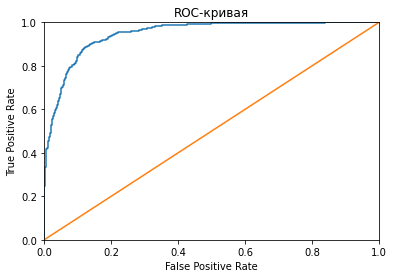

In [57]:
roc_graph(best_model)

### Вывод

Итоговые метрики:
- F1-мера = 0.597
- AUC_ROC = 0.855

В ходе тестирования модели удалось достичь необходимого значения F1-меры более 0,59. 

Метрика AUC-ROC рассчитывается как площадь под ROC-кривой, она показывает отличие модели от случайной. AUC-ROC случайной модели равна 0,5.

По достаточно высоким значениям AUC-ROC и F1-меры можно сделать вывод, что **модель обладает хорошим качеством**.

## Общий вывод

В ходе проекта были исследованы исторические данные о поведении клиентов и расторжении договоров с банком. 

В ходе исследования задачи был выявлен дисбаланс классов, а также были построены **модели для классификации**, которые предсказывают уйдёт клиент из банка в ближайшее время или нет. Для этого данные были разбиты на три выборки: **обучающую, валидационную и тестовую** в соотношении **3:1:1**. Были использованы следующие алгоритмы для построения моделей:
1. Decision Tree (Дерево решений),
2. Random Forest (Случайный лес) с двумя гиперпараметрами (n_estimators и max_depth),
3. Logistic Regression (Логическая регрессия),
4. CatBoost (Градиентный бустинг)

Для каждой модели рассчитаны показатели качества - **Accuracy, F1-мера, Precision, Recall**.

Для борьбы с дисбалансом было использовано три техники:
1. class weight (взвешивание классов)
2. upsampling (увеличение выборки)
3. downsampling (уменьшение выборки)

Использование перечисленных методов привело к увеличению **F1-меры**, а также к значительному увеличению метрики Recall, метрика Precision, наоборот, уменьшилась. Лучшей по значению **F1-меры** стала модель **CatBoost с upsampling**.

В ходе тестирования модели CatBoost было получено значение F1-меры равное 0.597, что соответвует требованиям задания.

Также была рассчитана метрика **AUC-ROC** и построена **ROC-кривая** для выбранной модели CatBoost. По достаточно высоким значениям AUC-ROC и F1-меры был сделан вывод о достаточно хорошем качестве выбранной модели.